To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Minimum Cost Network Flow Problem

In this tutorial we will solve minimum cost network flow problems using the Python library "NetworkX". 

First, let's start by importing the libraries.

In [2]:
import numpy as np
import networkx as nx

# Problem 02

A manufacturing plant produces two products that share the same production line. There are production capacities per period defined for each product. The manufacturing of the products requires critical supplies of two components. Each product's BOM has different component requirements. Finally, the prices of the products are also different.

| Products   | Component A (BOM) | Component B (BOM) | Prices | Capacity | Demand |
| :--: | :-----: | :----------: | :----------: | :----------: | :----------: |
| I  |  -   | 1         | 14 |  750 | 350 |
| II  |  1   | -         | 12 | 800 | 400 |

| Components | Supplies | Costs |
| :--: | :--: | :--: |
| A |  500 | 3 |
| B |  450 | 2 |

The Python library "NetworkX" supports directed graphs with self loops through the class DiGraph.

In [3]:
G1 = nx.DiGraph()
G1.add_nodes_from([
    ("A", {"color": "blue", "demand": -500}),
    ("B", {"color": "red", "demand": -450}),
    ("I", {"color": "blue", "demand": 0}),
    ("II", {"color": "red", "demand": 0}),
    ("SI", {"color": "blue", "demand": 350}),
    ("SII", {"color": "red", "demand": 400}),
    ("DC", {"color": "black", "demand": -750}),
    ("DD", {"color": "black", "demand": 950})
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = {
    "A":np.array([0.0,2.0]),
    "B":np.array([0.0,0.0]),
    "I":np.array([1.5,2.0]),
    "II":np.array([1.5,0.0]),
    "SI":np.array([3.0,2.0]),
    "SII":np.array([3.0,0.0]),
    "DC":np.array([0.0,-1.0]),
    "DD":np.array([3.0,-1.0])
}

{('A', 'I'): Text(0.5249999999999999, 2.0, '3'),
 ('A', 'DD'): Text(1.0499999999999998, 0.9500000000000001, '0'),
 ('B', 'II'): Text(0.5249999999999999, 0.0, '2'),
 ('B', 'DD'): Text(1.0499999999999998, -0.35, '0'),
 ('I', 'SI'): Text(2.025, 2.0, '-14'),
 ('II', 'SII'): Text(2.025, 0.0, '-12'),
 ('DC', 'SI'): Text(1.0499999999999998, 0.04999999999999993, '0'),
 ('DC', 'SII'): Text(1.0499999999999998, -0.65, '0'),
 ('DC', 'DD'): Text(1.0499999999999998, -1.0, '0')}

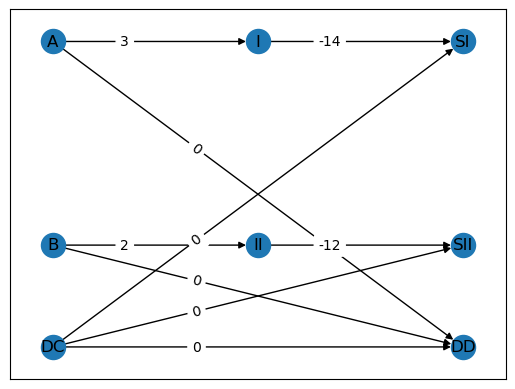

In [5]:
elist = [("A", "I"), 
         ("B", "II"), 
         ("I", "SI"), 
         ("II", "SII"), 
         ("DC", "SI"),
         ("DC", "SII"),
         ("DC", "DD"), 
         ("A", "DD"), 
         ("B", "DD")]
G1.add_edges_from(elist)
eattrs = {("A", "I"): {"weight": 3, "capacity": 5000}, 
          ("B", "II"): {"weight": 2, "capacity": 5000}, 
          ("I", "SI"): {"weight": -14, "capacity": 750}, 
          ("II", "SII"): {"weight": -12, "capacity": 800}, 
          ("DC", "SI"): {"weight": 0, "capacity": 5000}, 
          ("DC", "SII"): {"weight": 0, "capacity": 5000},
          ("DC", "DD"): {"weight": 0, "capacity": 5000}, 
          ("A", "DD"): {"weight": 0, "capacity": 5000}, 
          ("B", "DD"): {"weight": 0, "capacity": 5000}}
nx.set_edge_attributes(G1, eattrs)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'weight'), label_pos = 0.65)
#nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'capacity'), label_pos = 0.6)

To get information on the graph "G1":

In [6]:
print(G1)

DiGraph with 8 nodes and 9 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 2)	3
  (0, 7)	0
  (1, 3)	2
  (1, 7)	0
  (2, 4)	-14
  (3, 5)	-12
  (6, 4)	0
  (6, 5)	0
  (6, 7)	0


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[  0   0   3   0   0   0   0   0]
 [  0   0   0   2   0   0   0   0]
 [  0   0   0   0 -14   0   0   0]
 [  0   0   0   0   0 -12   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [9]:
mincostnetworkflows = nx.min_cost_flow(G1)
print(mincostnetworkflows)

{'A': {'I': 350, 'DD': 150}, 'B': {'II': 400, 'DD': 50}, 'I': {'SI': 350}, 'II': {'SII': 400}, 'SI': {}, 'SII': {}, 'DC': {'SI': 0, 'SII': 0, 'DD': 750}, 'DD': {}}


In [10]:
cost = nx.cost_of_flow(G1, mincostnetworkflows, weight='weight')
print(cost)

-7850


Now, we introduce a new component that can replace both components at a higher cost.

| Component | Supply | Cost |
| :--: | :--: | :--: |
| C |  2000 | 7 |

In addition, both products can be sold in a different market for 8 units of currency, where the total demand is 2000 units.

In [11]:
G2 = nx.DiGraph()
G2.add_nodes_from([
    ("A", {"color": "blue", "demand": -500}),
    ("B", {"color": "red", "demand": -450}),
    ("C", {"color": "green", "demand": -2000}),
    ("I", {"color": "blue", "demand": 0}),
    ("II", {"color": "red", "demand": 0}),
    ("SI", {"color": "blue", "demand": 350}),
    ("SII", {"color": "red", "demand": 400}),
    ("SIII", {"color": "green", "demand": 2000}),
    ("DC", {"color": "black", "demand": -2750}),
    ("DD", {"color": "black", "demand": 2950})
])

In [12]:
nodepos = {
    "A":np.array([0.0,2.0]),
    "B":np.array([0.0,0.0]),
    "C":np.array([0.0,1.0]),
    "I":np.array([1.5,2.0]),
    "II":np.array([1.5,0.0]),
    "SI":np.array([3.0,2.0]),
    "SII":np.array([3.0,0.0]),
    "SIII":np.array([3.0,1.0]),
    "DC":np.array([0.0,-1.0]),
    "DD":np.array([3.0,-1.0])
}

{('A', 'I'): Text(0.5249999999999999, 2.0, '3'),
 ('A', 'DD'): Text(1.0499999999999998, 0.9500000000000001, '0'),
 ('B', 'II'): Text(0.5249999999999999, 0.0, '2'),
 ('B', 'DD'): Text(1.0499999999999998, -0.35, '0'),
 ('C', 'I'): Text(0.5249999999999999, 1.35, '7'),
 ('C', 'II'): Text(0.5249999999999999, 0.65, '7'),
 ('C', 'DD'): Text(1.0499999999999998, 0.30000000000000004, '0'),
 ('I', 'SI'): Text(2.025, 2.0, '-14'),
 ('II', 'SII'): Text(2.025, 0.0, '-12'),
 ('SI', 'SIII'): Text(3.0, 1.65, '6'),
 ('SII', 'SIII'): Text(3.0, 0.35, '4'),
 ('DC', 'SI'): Text(1.0499999999999998, 0.04999999999999993, '0'),
 ('DC', 'SII'): Text(1.0499999999999998, -0.65, '0'),
 ('DC', 'SIII'): Text(1.0499999999999998, -0.30000000000000004, '0'),
 ('DC', 'DD'): Text(1.0499999999999998, -1.0, '0')}

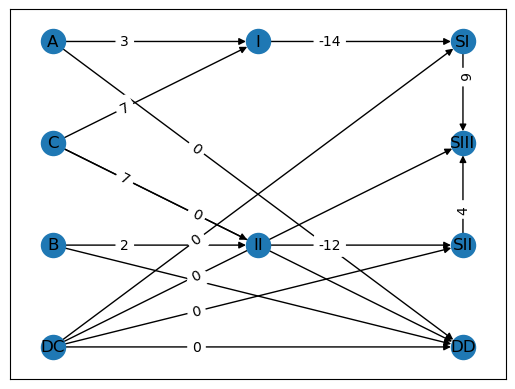

In [13]:
elist = [("A", "I"), 
         ("B", "II"),
         ("C", "I"),
         ("C", "II"),
         ("C", "DD"),
         ("I", "SI"), 
         ("II", "SII"),
         ("SI", "SIII"),
         ("SII", "SIII"),
         ("DC", "SI"),
         ("DC", "SII"),
         ("DC", "SIII"),
         ("DC", "DD"), 
         ("A", "DD"), 
         ("B", "DD")]
G2.add_edges_from(elist)
eattrs = {("A", "I"): {"weight": 3, "capacity": 5000}, 
          ("B", "II"): {"weight": 2, "capacity": 5000},
          ("C", "I"): {"weight": 7, "capacity": 5000},
          ("C", "II"): {"weight": 7, "capacity": 5000},
          ("C", "DD"): {"weight": 0, "capacity": 5000},
          ("I", "SI"): {"weight": -14, "capacity": 750}, 
          ("II", "SII"): {"weight": -12, "capacity": 800},
          ("SI", "SIII"): {"weight": 6, "capacity": 5000}, 
          ("SII", "SIII"): {"weight": 4, "capacity": 5000},
          ("DC", "SI"): {"weight": 0, "capacity": 5000}, 
          ("DC", "SII"): {"weight": 0, "capacity": 5000},
          ("DC", "SIII"): {"weight": 0, "capacity": 5000},
          ("DC", "DD"): {"weight": 0, "capacity": 5000}, 
          ("A", "DD"): {"weight": 0, "capacity": 5000}, 
          ("B", "DD"): {"weight": 0, "capacity": 5000}}
nx.set_edge_attributes(G2, eattrs)
nx.draw_networkx_nodes(G2, pos = nodepos)
nx.draw_networkx_labels(G2, pos = nodepos)
nx.draw_networkx_edges(G2, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G2, pos = nodepos, edge_labels = nx.get_edge_attributes(G2,'weight'), label_pos = 0.65)
#nx.draw_networkx_edge_labels(G2, pos = nodepos, edge_labels = nx.get_edge_attributes(G2,'capacity'), label_pos = 0.6)

In [14]:
mincostnetworkflows = nx.min_cost_flow(G2)
print(mincostnetworkflows)

{'A': {'I': 500, 'DD': 0}, 'B': {'II': 450, 'DD': 0}, 'C': {'I': 250, 'II': 350, 'DD': 1400}, 'I': {'SI': 750}, 'II': {'SII': 800}, 'SI': {'SIII': 400}, 'SII': {'SIII': 400}, 'SIII': {}, 'DC': {'SI': 0, 'SII': 0, 'SIII': 1200, 'DD': 1550}, 'DD': {}}


In [15]:
cost = nx.cost_of_flow(G2, mincostnetworkflows, weight='weight')
print(cost)

-9500
